--- simulating ergodic coverage ---
--- finished simulating ---
--Assuming square grid


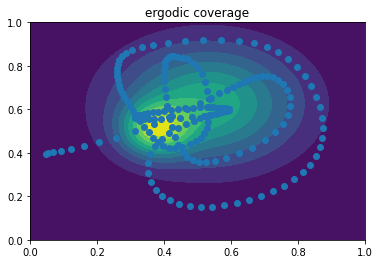

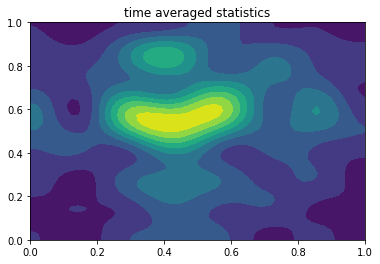

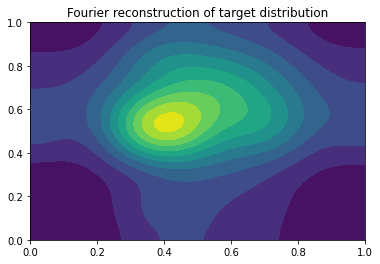

In [2]:
from double_integrator import DoubleIntegrator
from ergodic_control import RTErgodicControl
from target_dist import TargetDist
from utils import convert_phi2phik, convert_ck2dist, convert_traj2ck, convert_phik2phi
import numpy as np

import matplotlib.pyplot as plt

import os

np.random.seed(3)

env         = DoubleIntegrator()
model       = DoubleIntegrator()
t_dist      = TargetDist(num_nodes=2)
erg_ctrl    = RTErgodicControl(model, t_dist,
                        horizon=10, num_basis=8, batch_size=-1)

# setting the phik on the ergodic controller
erg_ctrl.phik = convert_phi2phik(erg_ctrl.basis, t_dist.grid_vals, t_dist.grid)

print('--- simulating ergodic coverage ---')
log = {'trajectory' : []}
tf = 200
state = env.reset()
for t in range(tf):
    ctrl = erg_ctrl(state)
    state = env.step(ctrl)
    log['trajectory'].append(state)
print('--- finished simulating ---')

xy, vals = t_dist.get_grid_spec()
plt.figure(1)
plt.title('ergodic coverage')
plt.contourf(*xy, vals, levels=10)
xt = np.stack(log['trajectory'])
plt.scatter(xt[:tf,0], xt[:tf,1])

path = xt[:tf,model.explr_idx]
ck = convert_traj2ck(erg_ctrl.basis, path)
val = convert_ck2dist(erg_ctrl.basis, ck)

plt.figure(2)
plt.title('time averaged statistics')
plt.contourf(*xy, val.reshape(50,50), levels=10)
plt.figure(3)
plt.title('Fourier reconstruction of target distribution')
phi = convert_phik2phi(erg_ctrl.basis, erg_ctrl.phik, t_dist.grid)
plt.contourf(*xy, phi.reshape(50,50), levels=10)

plt.show()
